Text(0.5, 1.0, 'Screw Plot or Elbow Curve for Determining appropriate Clusters')

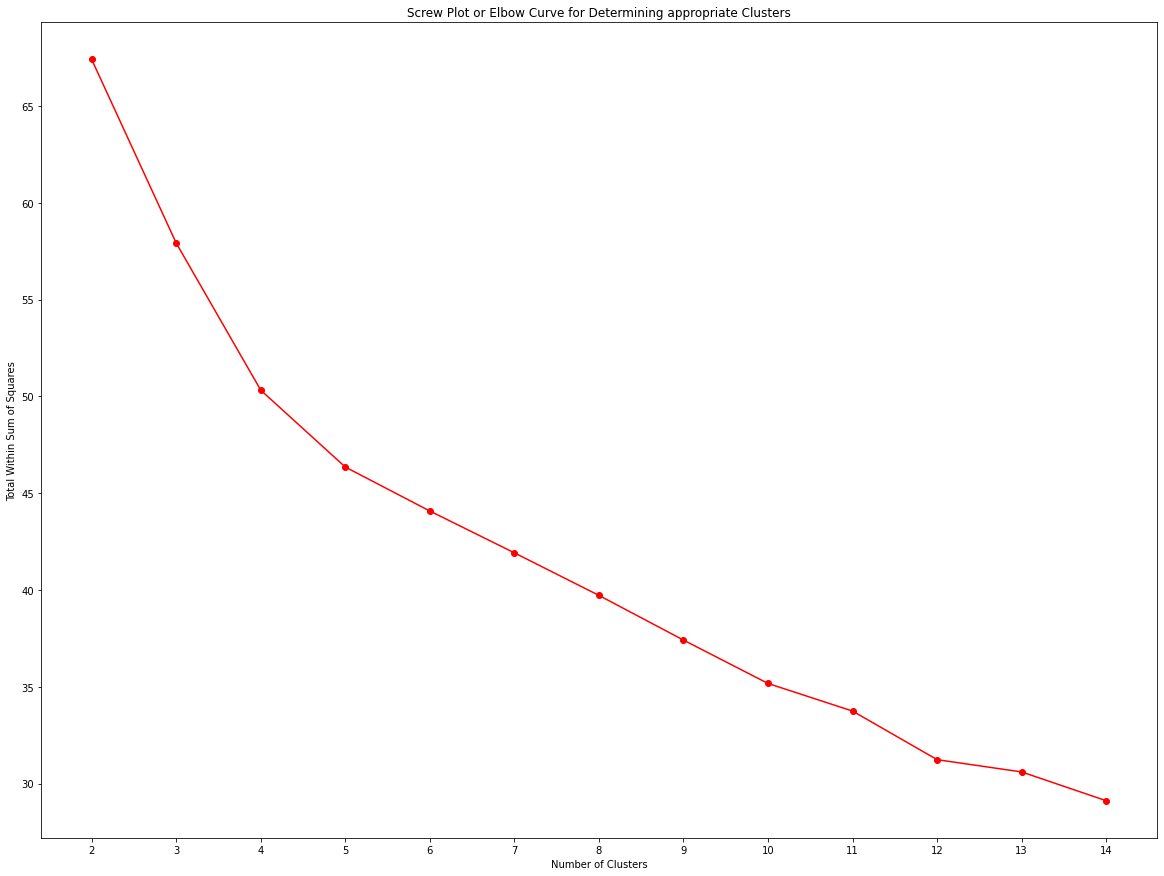

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

initial_crimes_df = pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\Clustering\\crime_data.csv",header=0)
crimes=initial_crimes_df.drop(['Unnamed: 0'],axis=1)
# Normalizing the numerical data
features_crimes_normal = pd.DataFrame(data = scale(crimes), columns = ['Murder', 'Assault', 'UrbanPop', 'Rape'])

###### screw plot or elbow curve ############
kclusters = list(range(2,15))
TWSS = [] # variable for storing total within sum of squares for each kmeans

for i in kclusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(features_crimes_normal)
    WSS = [] # variable for storing within sum of squares for each cluster
    for j in range(i):
        WSS.append(sum(cdist(features_crimes_normal.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,features_crimes_normal.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

plt.figure(figsize=(20,15))
plt.plot(kclusters,TWSS, 'ro-')
plt.xlabel("Number of Clusters")
plt.ylabel("Total Within Sum of Squares")
plt.xticks(kclusters)
plt.title('Screw Plot or Elbow Curve for Determining appropriate Clusters')

In [16]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
kmeans_model=KMeans(n_clusters=4) 
kmeans_model.fit(features_crimes_normal)

# getting the labels of clusters assigned to each row 
#kmeans_model.labels_ 

class_labels=pd.Series(kmeans_model.labels_)  # converting numpy array into pandas series object 
features_crimes_normal['Class']=class_labels  # creating a  new column and assigning it to new column 
features_crimes_normal.head(10)

,Murder,Assault,UrbanPop,Rape,Class
0,1.255179,0.790787,-0.526195,-0.003451,3
1,0.513019,1.118060,-1.224067,2.509424,1
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,3
4,0.281093,1.275635,1.776781,2.088814,1
5,0.025976,0.402909,0.869548,1.883901,1
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,1
9,2.229265,0.487757,-0.386621,0.492653,3
